The **bias–variance tradeoff** describes the relationship between a model's complexity, the accuracy of its predictions, and how well it can make predictions on previously unseen data that were not used to train the model.

As the number of tunable parameters in a model increase, it becomes more flexible and can better fit a training data set. That is, the model has lower error or lower bias. However, for more flexible models, there will tend to be greater variance to the model fit each time we take a set of samples to create a new training data set. It is said that there is greater variance in the model’s estimated parameters. 

The bias error comes from the assumptions in the learning algorithms. - Underfitting.

The variance error comes from sensitivity to small fluctuations in the training set. - Overfitting.

The bias - variance decomposition is a way of analyzing a learning algorithm’s expected generalization error with respect to a particular problem as a sum of three terms, the bias, variance and the irreducible error. 

Ideally we went to choose a model that both accurately captures the regularities in its training data, but also generalizes well to unseen data. 

A model can have high variance even with very few parameters if small changes in the data cause large changes in the learned function. A model can also have high bias if its function class is misaligned with the true data-generating process. Therefore, parameter count does not define model complexity. 

We have a data-generating process; $y=f(x)+\epsilon$ where $x$ is a fixed test input, $f(x)$ is the true, unknown regression function, and $\epsilon$ is noise with expected value 0 and variance of $\sigma^2$.  The training dataset $D$ is random and the learned model $\hat{f}(x;D)$ is therefore random because it depends on D. 

We want to understand the expected mean squared error at a fixed point x; 

$$
\begin{align*}E_{D,\epsilon}\left[(y-\hat{f}(x;D)^2\right] = \left(Bias_D\left[\hat{f}(x;D)\right]\right)^2 +  Var_D\left[\hat{f}(x;D)\right]+\sigma^2\end{align*}
$$

**Bias measures** the systematic error of a model: **the difference between the true function value and the model’s average prediction over all possible training datasets.** 

**Variance measures** instability: **how much the model’s prediction at a fixed input changes across different training datasets.** 

Noise is irreducible randomness in the data and cannot be reduced by any model.

For a fixed input x, the expected squared error decomposes as 

$$
\Large \mathrm{Bias}_D\!\left[\hat f(x;D)\right]= \mathbb{E}_D\!\left[\hat f(x;D)\right] - f(x)
$$

$$
\Large \mathrm{Var}_D\!\left[\hat f(x;D)\right]= \mathbb{E}_D\!\left[\left(\hat f(x;D) - \mathbb{E}_D\!\left[\hat f(x;D)\right]\right)^2\right]
$$

$$
\Delta(x;D)= \hat f(x;D) - \mathbb{E}_D\!\left[\hat f(x;D)\right]
$$

$$
\mathbb{E}_D\!\left[\Delta(x;D)\right] = 0
$$

$$
\mathbb{E}_{D,\epsilon}\left[\left(y - \hat f(x;D)\right)^2\right]=\left(\mathrm{Bias}_D\!\left[\hat f(x;D)\right]\right)^2+\mathrm{Var}_D\!\left[\hat f(x;D)\right]+\sigma^2
$$

- The expectation in bias and variance is always over training datasets, not over test points.
- Bias and variance are defined pointwise, fix x, vary the dataset.
- Whether x appears in a particular training set does not change the definitions of bias or variance.
- Training error is lower because the model is conditioned on seeing the training data.
- Test error is higher because this conditioning is absent.
- This difference does not mean bias changes between training and test point.
- Bias and variance are independent quantities
- High variance does not imply high bias
- Low variance does not imply low bias
- A model can have low bias and high variance, high bias and low variance, both high or both low.
- The bias-variance trade-off is not a causal relationship between bias and variance.
- Both bias and variance depend on a shared control parameter( model capacity or flexibility).
- Increasing model capacity typically : decrease bias and increase variance.
- Decreasing model capacity typically increase bias and decrease variance.
- Model complexity is not determined by the number of parameters.
- A single parameter can control highly complex behavior
- Complexity is better characterised by sensitivity to data, smoothness and expressivity.
- kNN with small k: low bias, high variance
- kNN with large k: high bias, low variance
- Linear regression on nonlinear data: high bias, low variance

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

# True function
def f(x):
    return np.sin(2 * np.pi * x)

# Noise level
sigma = 0.3

# Fixed test point
x0 = 0.25
true_y = f(x0)

In [9]:
def generate_dataset(n_samples):
    X = np.random.uniform(0, 1, size=n_samples)
    y = f(X) + np.random.normal(0, sigma, size=n_samples)
    return X, y


In [10]:
def fit_polynomial(X, y, degree):
    coeffs = np.polyfit(X, y, degree)
    return np.poly1d(coeffs)

In [11]:
def bias_variance_estimate(degree, n_datasets=200, n_samples=20):
    predictions = []

    for _ in range(n_datasets):
        X, y = generate_dataset(n_samples)
        model = fit_polynomial(X, y, degree)
        predictions.append(model(x0))

    predictions = np.array(predictions)

    bias = np.mean(predictions) - true_y
    variance = np.var(predictions)

    return bias**2, variance


In [12]:
degrees = range(0, 15)

biases = []
variances = []

for d in degrees:
    b, v = bias_variance_estimate(d)
    biases.append(b)
    variances.append(v)


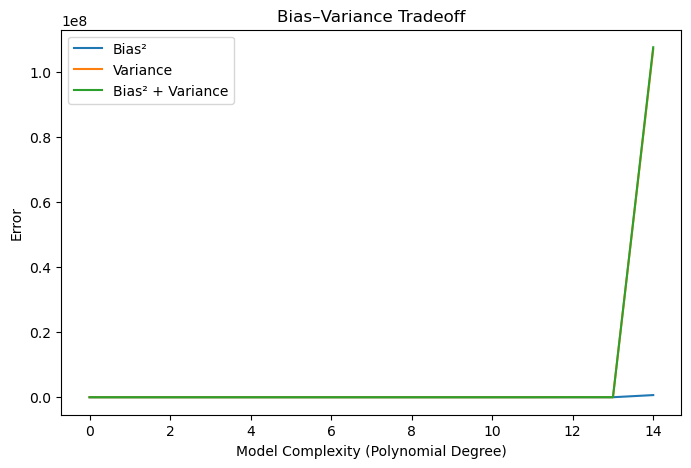

In [13]:
plt.figure(figsize=(8,5))
plt.plot(degrees, biases, label="Bias²")
plt.plot(degrees, variances, label="Variance")
plt.plot(degrees, np.array(biases) + np.array(variances), label="Bias² + Variance")
plt.xlabel("Model Complexity (Polynomial Degree)")
plt.ylabel("Error")
plt.legend()
plt.title("Bias–Variance Tradeoff")
plt.show()
